In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn import linear_model

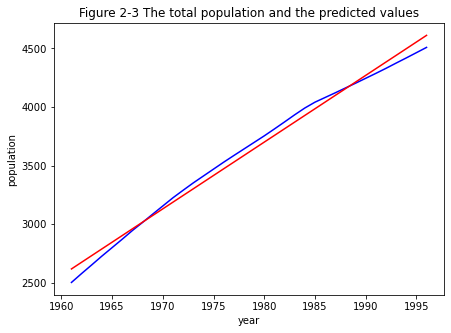

In [2]:
# Example 2.1
z = []

with open('../data/population.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
pop = np.array(z) 
pop = np.round(pop / 10000)
ln_pop = np.log(z)
t = np.array(range(len(z)))
t2 = t * t

m1 = linear_model.LinearRegression()
m1.fit(t.reshape(-1, 1), pop)

z_ts = pd.DataFrame(np.vstack([pop, m1.intercept_ + m1.coef_*t]).T,
    index=pd.date_range("1960-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'b')
ax.plot(z_ts['Xt'], 'r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("Figure 2-3 The total population and the predicted values")
plt.show()

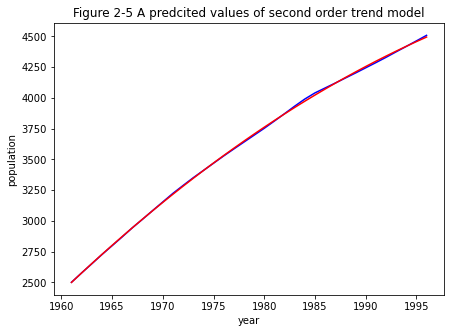

In [3]:
X = np.vstack([t, t2]).T
m2 = linear_model.LinearRegression()
m2.fit(X, pop)

z_ts = pd.DataFrame(np.hstack([pop.reshape(-1, 1), (m2.intercept_ + np.sum(X * m2.coef_, axis=1)).reshape(-1, 1)]),
    index=pd.date_range("1960-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'b')
ax.plot(z_ts['Xt'], 'r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("Figure 2-5 A predcited values of second order trend model")
plt.show()

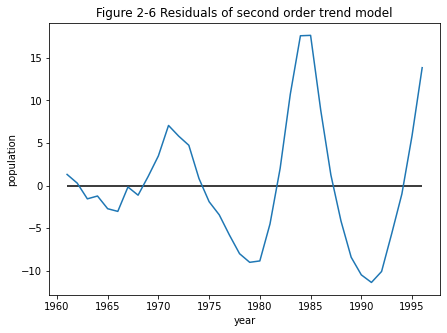

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'] - z_ts["Xt"])
ax.hlines(0, min(z_ts.index), max(z_ts.index), color="black")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("Figure 2-6 Residuals of second order trend model")
plt.show()

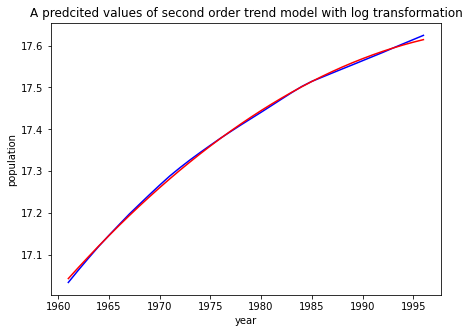

In [5]:
X = np.vstack([t, t2]).T
m2 = linear_model.LinearRegression()
m2.fit(X, ln_pop)

z_ts = pd.DataFrame(np.hstack([ln_pop.reshape(-1, 1), (m2.intercept_ + np.sum(X * m2.coef_, axis=1)).reshape(-1, 1)]),
    index=pd.date_range("1960-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'b')
ax.plot(z_ts['Xt'], 'r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("A predcited values of second order trend model with log transformation")
plt.show()

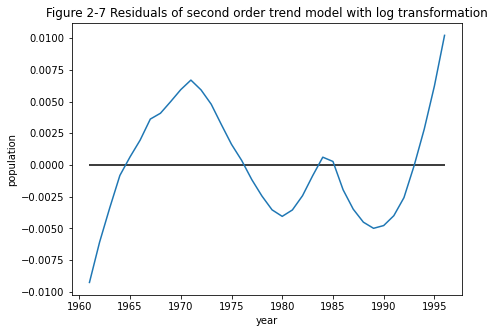

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'] - z_ts["Xt"])
ax.hlines(0, min(z_ts.index), max(z_ts.index), color="black")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5)) 
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.set_title("Figure 2-7 Residuals of second order trend model with log transformation")
plt.show()

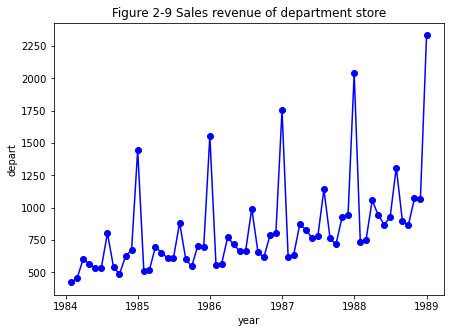

In [7]:
# Example 2.2
z = []

with open('../data/depart.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
z_ts = pd.DataFrame(z,
    index=pd.date_range("1984-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("depart")
ax.set_title("Figure 2-9 Sales revenue of department store")
plt.show()

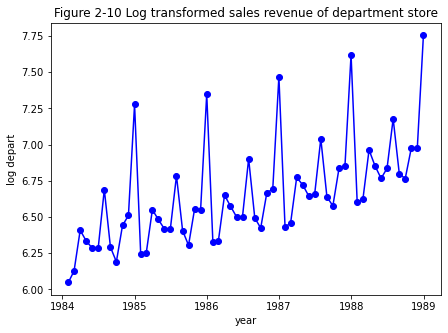

In [8]:
ln_dep = np.log(z)

z_ts = pd.DataFrame(ln_dep,
    index=pd.date_range("1984-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("log depart")
ax.set_title("Figure 2-10 Log transformed sales revenue of department store")
plt.show()

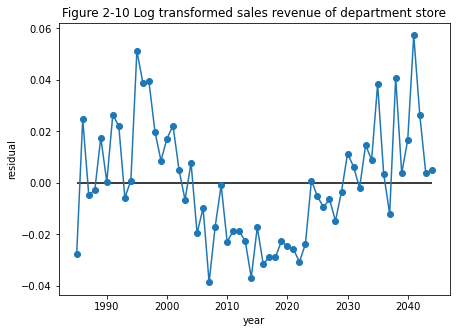

In [9]:
trend = np.array(list(range(len(z_ts)))).reshape(-1, 1)
y = z_ts.index.month.values
y = pd.get_dummies(y).values
X = np.hstack([trend, y])

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, ln_dep)

z_ts = pd.DataFrame(np.hstack([ln_dep.reshape(-1, 1), (np.sum(X * reg.coef_, axis=1)).reshape(-1, 1)]),
    index=pd.date_range("1984-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'] - z_ts['Xt'], 'o-')
ax.set_xlabel("year")
ax.set_ylabel("residual")
ax.hlines(0, min(z_ts.index), max(z_ts.index), color="black")
ax.set_title("Figure 2-10 Log transformed sales revenue of department store")
plt.show()

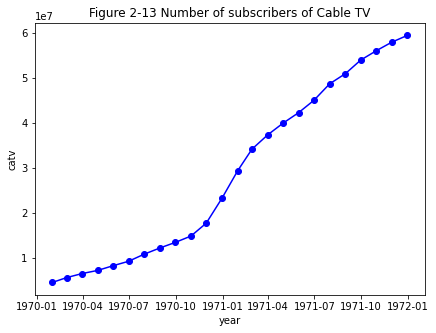

In [10]:
# Example 2.3
z = []

with open('../data/catv.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

k = 70000000                
t = np.array(range(len(z)))

catv = np.array(z)
ln_catv = np.log(k / catv - 1)

z_ts = pd.DataFrame(catv,
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("catv")
ax.set_title("Figure 2-13 Number of subscribers of Cable TV")
plt.show()

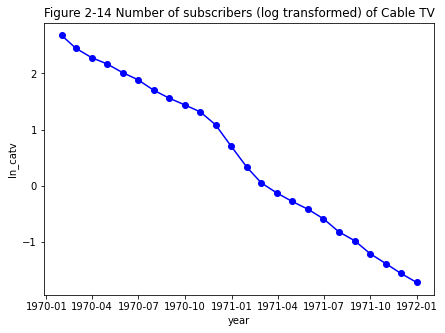

In [11]:
z_ts = pd.DataFrame(ln_catv,
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("ln_catv")
ax.set_title("Figure 2-14 Number of subscribers (log transformed) of Cable TV")
plt.show()

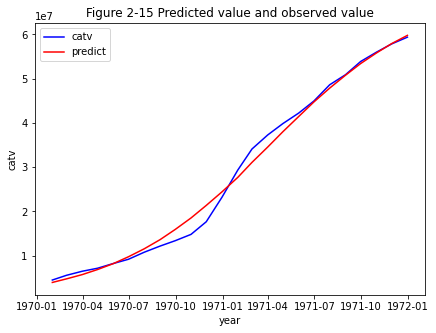

In [12]:
lm = linear_model.LinearRegression()
lm.fit(t.reshape(-1, 1), ln_catv)
pred = k / (np.exp(np.sum(lm.intercept_ + t.reshape(-1, 1) * lm.coef_, axis=1)) + 1)

z_ts = pd.DataFrame(np.hstack([catv.reshape(-1, 1), pred.reshape(-1, 1)]),
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt", "Xt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'b', label="catv")
ax.plot(z_ts['Xt'], 'r', label="predict")
ax.set_xlabel("year")
ax.set_ylabel("catv")
ax.set_title("Figure 2-15 Predicted value and observed value")
plt.legend()
plt.show()

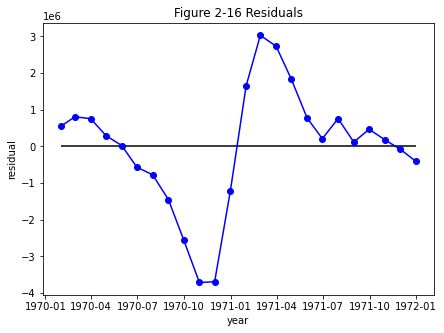

In [13]:
resid = catv - pred

z_ts = pd.DataFrame(resid,
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_ts['Zt'], 'o-b')
ax.set_xlabel("year")
ax.set_ylabel("residual")
ax.set_title("Figure 2-16 Residuals")
ax.hlines(0, min(z_ts.index), max(z_ts.index), "black")
plt.show()


/Users/jonghyun/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


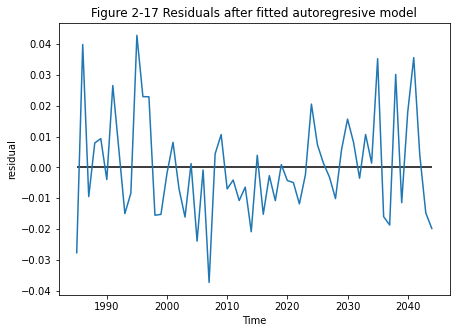

In [14]:
from statsmodels.tsa.arima_model import ARIMA

z = []

with open('../data/depart.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

ln_dep = np.log(z)

z_ts = pd.DataFrame(ln_dep,
    index=pd.date_range("1970-01-01", periods=len(z), freq="m"),
    columns=["Zt"]
)

trend = np.array(range(len(z_ts))).reshape(-1, 1)
y = z_ts.index.month.values
y = pd.get_dummies(y).values
X = np.hstack([trend, y])

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, ln_dep)

z_ts = pd.DataFrame(np.hstack([ln_dep.reshape(-1, 1), (np.sum(X * reg.coef_, axis=1)).reshape(-1, 1)]),
    index=pd.date_range("1984-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

resid = z_ts["Zt"] - z_ts["Xt"]

model = ARIMA(resid, order=(3,0,0))
model_fit = model.fit(trend='c', full_output=True, disp=0)
final_resid = model_fit.resid

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(final_resid, '-')
ax.set_xlabel("Time")
ax.set_ylabel("residual")
ax.set_title("Figure 2-17 Residuals after fitted autoregresive model")
ax.hlines(0, min(z_ts.index), max(z_ts.index), "black")
plt.show()

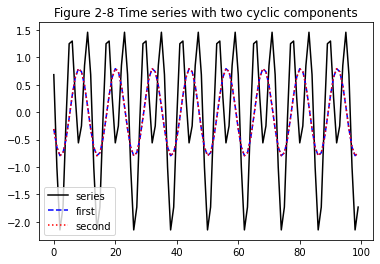

In [15]:
# Figure 2.8 주기 성분을 갖는 시계열

import math

n = 100
t = np.arange(n)
a1 = -0.8
a2 = 1.4
phi_1 = math.pi / 8
phi_2 = 3 * math.pi / 4

first = a1 * np.sin(math.pi * t / 6 + phi_1)
second = a2 * np.sin(math.pi * t / 3 + phi_2)

z = first + second

plt.plot(t, z, color="black", linestyle="-", label="series")
plt.plot(t, first, color="blue", linestyle="--", label="first")
plt.plot(t, first, color="red", linestyle=":", label="second")
plt.title("Figure 2-8 Time series with two cyclic components")
plt.legend()
plt.show()

/var/folders/nw/x1lqw0rx1mj698bqcgqxhk880000gn/T/ipykernel_94681/512967855.py:6: RuntimeWarning: divide by zero encountered in true_divide
  z1 = np.exp(b0 + b1 / t)


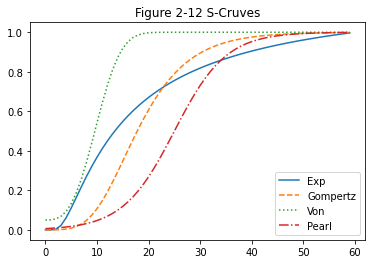

In [16]:
# Figure 2.12

b0 = 0.2
b1 = -12
t = np.arange(60)
z1 = np.exp(b0 + b1 / t)

# Gompertz
b0 = 10
b1 = 0.15
k = 1
z2 = k * np.exp(-b0 * np.exp(-b1 * t))

# Von
b0 = 0.95
b1 = 0.09
z3 = 1 - b0 * np.exp((-b1*t)**3)

# Perl
b0 = 5
b1 = -0.2
k = 1
z4 = k / (1 + np.exp(b0 + b1 * t))

plt.plot(t, z1, linestyle="-", label="Exp")
plt.plot(t, z2, linestyle="--", label="Gompertz")
plt.plot(t, z3, linestyle=":", label="Von")
plt.plot(t, z4, linestyle="-.", label="Pearl")
plt.title("Figure 2-12 S-Cruves")
plt.legend()
plt.show()

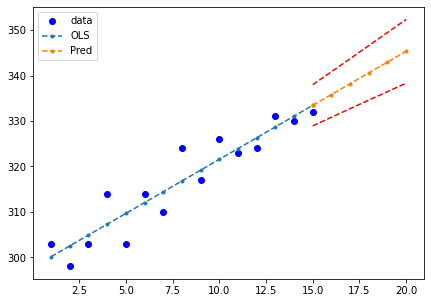

In [17]:
import statsmodels.api as sm

z = np.array([303, 298, 303, 314, 303, 314, 310, 324, 317, 326, 323, 324, 331, 330, 332])
t = np.arange(1, len(z) + 1).reshape(-1, 1)
t_ = sm.add_constant(t)
model = sm.OLS(z, t_)
res = model.fit()

X_test = np.array([
    [1, 15],
    [1, 16],
    [1, 17],
    [1, 18],
    [1, 19],
    [1, 20],
])
new_pred = res.get_prediction(X_test).summary_frame(alpha=0.05)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(t, z, "bo", label="data")
ax.plot(t, res.fittedvalues, "--.", label="OLS")
ax.plot(np.arange(15, 21), new_pred["mean"], "--.", label="Pred")
ax.plot(np.arange(15, 21), new_pred["mean_ci_lower"], "r--")
ax.plot(np.arange(15, 21), new_pred["mean_ci_upper"], "r--")
ax.legend(loc="best")
plt.show()


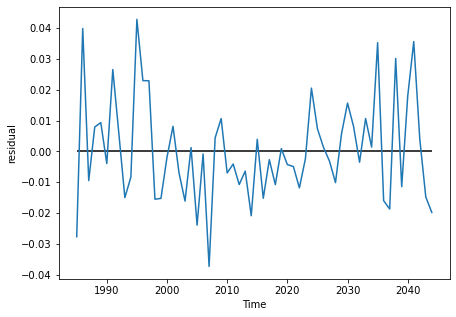

In [18]:
# Exercise 2.6

z = []

with open('../data/depart.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

t = np.arange(len(z))
ln_dept = np.log(z)

x1 = np.sin(2 * np.pi * t / 12).reshape(-1, 1)
x2 = np.cos(2 * np.pi * t / 12).reshape(-1, 1)
x3 = np.sin(2 * np.pi * t / 12*2).reshape(-1, 1)
x4 = np.cos(2 * np.pi * t / 12*2).reshape(-1, 1)
x5 = np.sin(2 * np.pi * t / 12*3).reshape(-1, 1)
x6 = np.cos(2 * np.pi * t / 12*3).reshape(-1, 1)
x7 = np.sin(2 * np.pi * t / 12*4).reshape(-1, 1)
x8 = np.cos(2 * np.pi * t / 12*4).reshape(-1, 1)
x9 = np.sin(2 * np.pi * t / 12*6).reshape(-1, 1)
x10 = np.cos(2 * np.pi * t / 12*6).reshape(-1, 1)

X = np.hstack([t.reshape(-1, 1), x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])
model = linear_model.LinearRegression()
model.fit(X, ln_dep)

z_ts = pd.DataFrame(np.hstack([ln_dep.reshape(-1, 1), (model.intercept_ + np.sum(X * model.coef_, axis=1)).reshape(-1, 1)]),
    index=pd.date_range("1984-01-01", periods=len(z), freq="y"),
    columns=["Zt", "Xt"]
)

resid = z_ts["Zt"] - z_ts["Xt"]

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(final_resid, '-')
ax.set_xlabel("Time")
ax.set_ylabel("residual")
ax.hlines(0, min(z_ts.index), max(z_ts.index), "black")
plt.show()

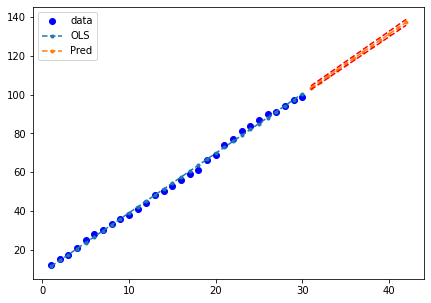

In [19]:
# Exercise 2.6

z = []

with open('../data/book.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

t = np.arange(1, len(z) + 1).reshape(-1, 1)
t_ = sm.add_constant(t)
model = sm.OLS(z, t_)
res = model.fit()

X_test = sm.add_constant(np.arange(31, 43))
new_pred = res.get_prediction(X_test).summary_frame(alpha=0.05)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(t, z, "bo", label="data")
ax.plot(t, res.fittedvalues, "--.", label="OLS")
ax.plot(np.arange(31, 43), new_pred["mean"], "--.", label="Pred")
ax.plot(np.arange(31, 43), new_pred["mean_ci_lower"], "r--")
ax.plot(np.arange(31, 43), new_pred["mean_ci_upper"], "r--")
ax.legend(loc="best")
plt.show()
